In [10]:
import numpy as np
import pandas as pd
import pickle
from lshash.lshash import LSHash
from MultiIndexHash import MultiIndexHash
import networkx as nx


import time

## LSH Network

In [2]:
with open('Data/feature_matrix/fc6_full_dress.p','rb') as f:
    feat_dresses = pickle.load(f)

In [54]:
n = np.sqrt(np.sum(feat_dresses**2,axis=1))

ValueError: operands could not be broadcast together with shapes (72158,4096) (72158,) 

In [55]:
feat_dresses_norm = feat_dresses/np.reshape(n,(-1,1))

In [3]:
lsh = LSHash(8,feat_dresses.shape[1])

In [4]:
start = time.time()
for i in range(feat_dresses.shape[0]):
    lsh.index(feat_dresses[i,:],extra_data = i)
print('{:.3f}'.format(time.time()-start))

18.310


In [5]:
G = nx.Graph()

In [6]:
start = time.time()
for i in range(feat_dresses.shape[0]):
    G.add_node(i)
    edges = lsh.query(feat_dresses[i,:], num_results=100)
    for e in edges:
        G.add_edge(i,e[0][1],weight=e[1])
        
print('{:.3f}'.format(time.time()-start))

40961.306


In [11]:
with open('Data/feature_matrix/Dress_network.p','wb') as f:
    pickle.dump(G,f)

In [12]:
bbox = pd.read_table('Data/DeepFashion/list_bbox.txt',sep='\s+')
cat = pd.read_table('Data/DeepFashion/list_category_img.txt',sep='\s+')
df = bbox[cat['category_label'] == 41]

In [13]:
from IPython.display import display
import PIL
from PIL import ImageDraw



def draw_bbox(bbox):
    img = PIL.Image.open('Data/DeepFashion/'+bbox['image_name']).convert('RGBA')
    
    lx = bbox['x_1']
    ly = bbox['y_1']
    ux = bbox['x_2']
    uy = bbox['y_2']
    rect = PIL.Image.new('RGBA', img.size, (255,255,255,0))
    d = ImageDraw.Draw(img)
    d.rectangle(((lx,ly), (ux,uy)), outline="red")
    return PIL.Image.alpha_composite(img,rect)

17 not connected


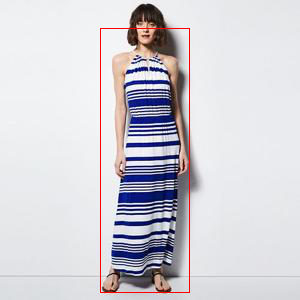

{'weight': 254.06023555818848}


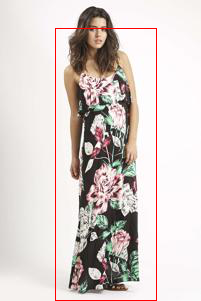

{'weight': 176.55204919648432}


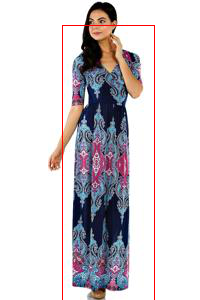

{'weight': 733.62231101623786}


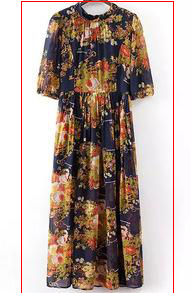

In [33]:
i = np.random.randint(df.shape[0],size=2)
j=0
while not nx.has_path(G,i[0],i[1]):
    j+=1
    i = np.random.randint(df.shape[0],size=2)

print("{} not connected".format(j))    
    
p = nx.shortest_path(G,i[0],i[1],weight='weight')
for i in range(len(p)):
    display(draw_bbox(df.iloc[p[i]]))
    if i<len(p)-1:
         print(G[p[i]][p[i+1]])

In [71]:
list(range(len(p)))

[0, 1, 2]

In [36]:
c = list(nx.connected_components(G))

In [37]:
len(c)

213

## MIH Network

In [3]:
f = feat_dresses > 0

In [13]:
start = time.time()
MIH = MultiIndexHash(f)
print('{:.2f} s'.format(time.time()-start))

57.60 s


In [14]:
G = nx.Graph()

In [16]:
start = time.time()
for i in range(100):
    G.add_node(i)
    edges = MIH.r_search(f[i,:],700)
    for e in edges:
        G.add_edge(i,e[0],weight=e[1])
        
print('{:.3f}'.format(time.time()-start))

14.090


In [17]:
f.shape[0]/100

721.58